In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


In [4]:
gdp_df.shape

(8219, 4)

There are 8219 rows and 4 columns in the gdp_percapita database

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

The data types are object, int64, and float64

In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [7]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [9]:
years = gdp_df.groupby('Country').count()
years

,Year,GDP_Per_Capita
Country,,
Afghanistan,24,24
Africa Eastern and Southern,34,34
Africa Western and Central,34,34
Albania,34,34
Algeria,34,34
...,...,...
Virgin Islands,21,21
West Bank and Gaza,30,30
World,34,34


In [10]:
years = years.reset_index()
years

,Country,Year,GDP_Per_Capita
0,Afghanistan,24,24
1,Africa Eastern and Southern,34,34
2,Africa Western and Central,34,34
3,Albania,34,34
4,Algeria,34,34
...,...,...,...
242,Virgin Islands,21,21
243,West Bank and Gaza,30,30
244,World,34,34
245,Zambia,34,34


## 7a: 228 countries have data for all years

In [11]:
years.loc[years.Year ==34]

,Country,Year,GDP_Per_Capita
1,Africa Eastern and Southern,34,34
2,Africa Western and Central,34,34
3,Albania,34,34
4,Algeria,34,34
5,Andorra,34,34
...,...,...,...
240,Vanuatu,34,34
241,Viet Nam,34,34
244,World,34,34
245,Zambia,34,34


## 7b: 5 countries had less than half of all the years

In [12]:
years.loc[years.Year<=17]

,Country,Year,GDP_Per_Capita
54,Djibouti,11,11
73,Faroe Islands,16,16
115,Kosovo,16,16
195,Sint Maarten (Dutch part),15,15
229,Turks and Caicos Islands,13,13


## 7c: The number of total observations increases year over year until 2023

In [13]:
countries = gdp_df.groupby('Year').count()
countries

,Country,GDP_Per_Capita
Year,,
1990,233,233
1991,234,234
1992,234,234
1993,234,234
1994,235,235
1995,236,236
1996,236,236
1997,238,238
1998,238,238


In [14]:
gdp2020 = gdp_df.loc[gdp_df.Year == 2020]
gdp2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


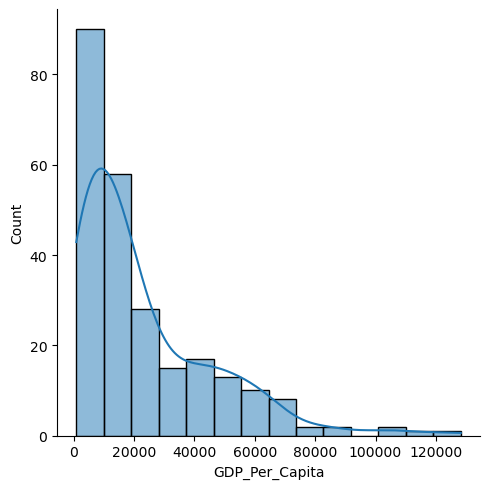

In [15]:
##histogram
sns.displot(data = gdp2020["GDP_Per_Capita"], kde=True)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

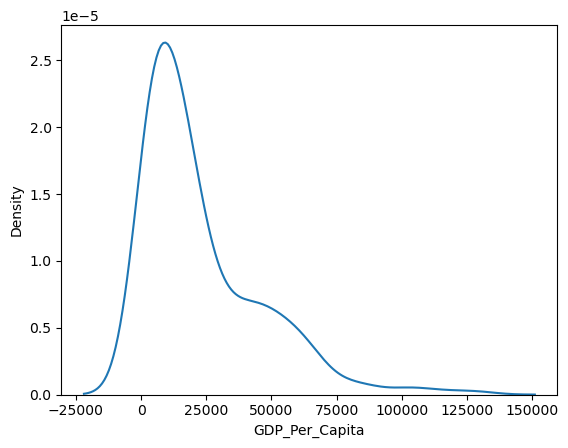

In [16]:
##density plot
sns.kdeplot(gdp2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

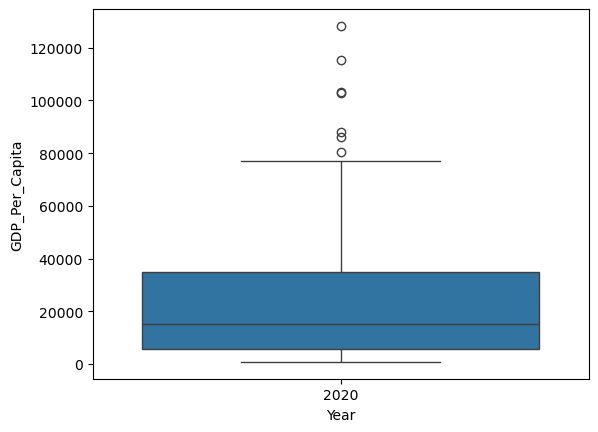

In [17]:
##boxplot
sns.boxplot(x=gdp2020["Year"], y=gdp2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

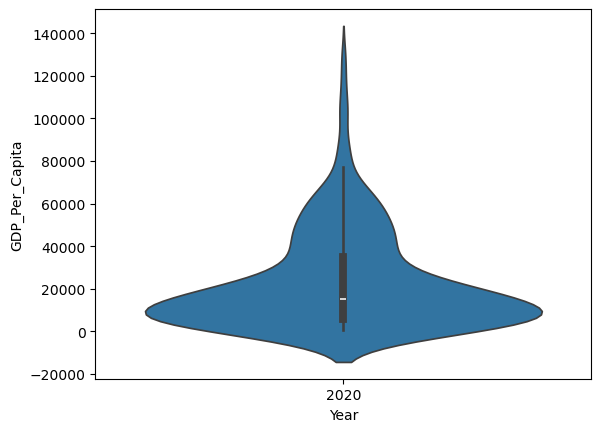

In [18]:
##violin chart
sns.violinplot(x=gdp2020['Year'], y=gdp2020['GDP_Per_Capita'])

In [19]:
gdp2020.describe()
##Question 9: median in 2020 is 15309.235988

,Year,GDP_Per_Capita
count,247.0,247.000000
mean,2020.0,23044.942556
std,0.0,22856.889868
min,2020.0,833.920257
25%,2020.0,5857.324918
50%,2020.0,15309.235988
75%,2020.0,34823.614188
max,2020.0,128256.560341


## Question 9: median in 2020 is 15309.235988

In [20]:
gdp_df


,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [21]:
gdp_decades = gdp_df.loc[((gdp_df.Year == 1990) | (gdp_df.Year == 2000) | (gdp_df.Year == 2010) | (gdp_df.Year == 2020))]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

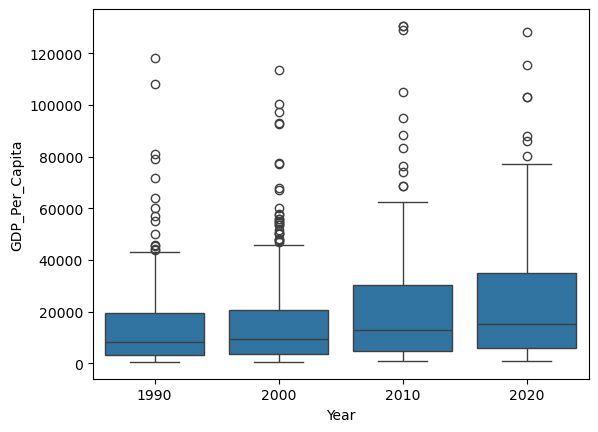

In [22]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

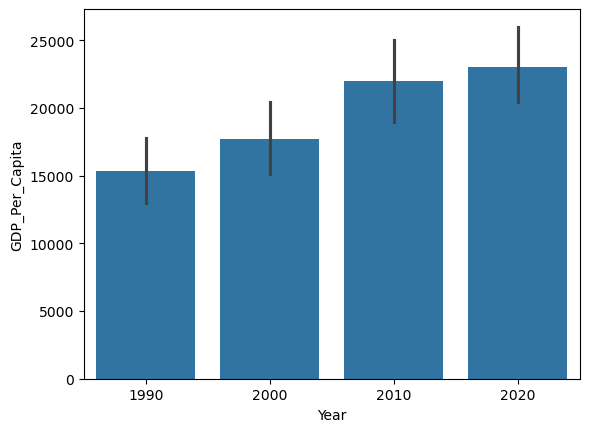

In [23]:
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)


<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

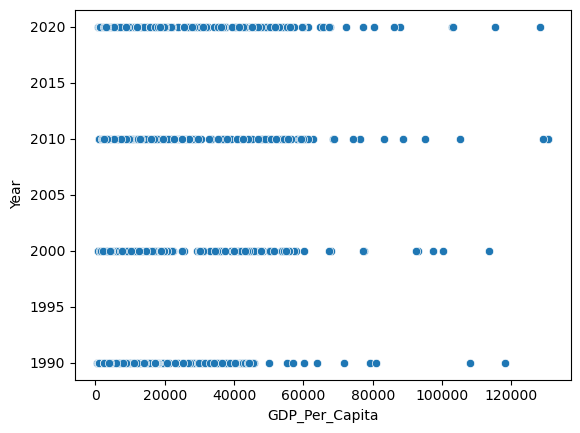

In [24]:
sns.scatterplot(x=gdp_decades["GDP_Per_Capita"], y=gdp_decades["Year"])

<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

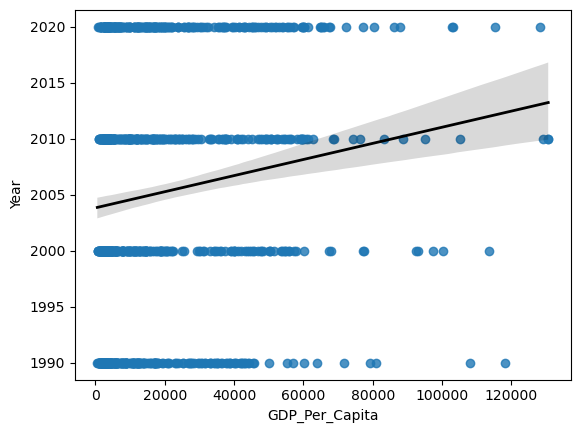

In [25]:

sns.regplot(
    x=gdp_decades["GDP_Per_Capita"],
    y=gdp_decades["Year"],
    line_kws={"color": "black", "linewidth":2})
 

##10: GDP has increased over time. The box chart and scatterplots clearly show the outliers in each year, although the scatterplots make it a little 
##less obvious that we're looking at 4 specific years. The bar chart makes the amount of increase year over year clearest.

In [26]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [27]:
gdp_first_100k = gdp_df.loc[gdp_df.GDP_Per_Capita > 100000]

## 11: Brunei was the first country to have a GDP over 100k in 1990

In [28]:
gdp_first_100k.nsmallest(1, 'Year')

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198


In [29]:
gdp2020 = gdp_df.loc[gdp_df.Year ==2020]

## 12a: Luxembourg had the highest GDP in 2020

In [30]:
gdp2020.nlargest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


In [31]:
gdpLux = gdp_df.loc[gdp_df.Country == 'Luxembourg']
gdpLux.head()

,Country,Year,GDP_Per_Capita
4423,Luxembourg,2023,130373.477942
4424,Luxembourg,2022,134507.667531
4425,Luxembourg,2021,135379.291201
4426,Luxembourg,2020,128256.560341
4427,Luxembourg,2019,131609.099616


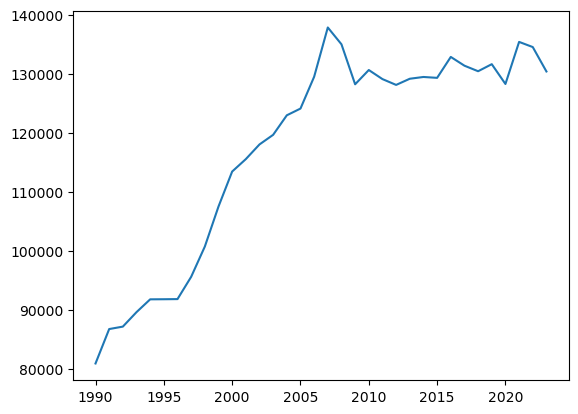

In [32]:
plt.plot(gdpLux.Year, gdpLux.GDP_Per_Capita)
##12b

## 13a Burundi had the smallest GDP in 2020 

In [33]:
gdp2020.nsmallest(1, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


In [34]:
gdpBur = gdp_df.loc[gdp_df.Country == 'Burundi']

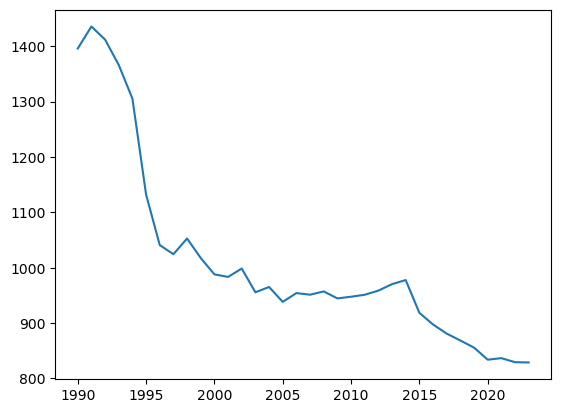

In [35]:
plt.plot(gdpBur.Year, gdpBur.GDP_Per_Capita)
##13b

In [36]:
gdp1990 = gdp_df.loc[gdp_df.Year == 1990]
gdp1990

,Country,Year,GDP_Per_Capita
57,Africa Eastern and Southern,1990,3386.854480
91,Africa Western and Central,1990,3299.401375
125,Albania,1990,5327.747458
159,Algeria,1990,11728.545729
193,Andorra,1990,50036.300776
...,...,...,...
8031,Vanuatu,1990,3101.680551
8065,Viet Nam,1990,2467.964601
8150,World,1990,11207.386344
8184,Zambia,1990,2425.111287


In [37]:
lower_gdp = pd.merge(gdp2020, gdp1990,
                     left_on = 'Country', right_on = 'Country',
                     how = 'inner')
lower_gdp.head()

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
0,Africa Eastern and Southern,2020,3861.111238,1990,3386.854480
1,Africa Western and Central,2020,4622.731427,1990,3299.401375
2,Albania,2020,14650.395929,1990,5327.747458
3,Algeria,2020,14194.155748,1990,11728.545729
4,Andorra,2020,55488.490299,1990,50036.300776


In [38]:
lower_gdp = lower_gdp.loc[lower_gdp.GDP_Per_Capita_x < lower_gdp.GDP_Per_Capita_y]

## 13 Bonus: There are 24 countries that had a lower GDP in 2020 than in 1990. In general, yes, it is typical to have a higher GDP in 2020.

In [39]:
lower_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 10 to 232
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           24 non-null     object 
 1   Year_x            24 non-null     int64  
 2   GDP_Per_Capita_x  24 non-null     float64
 3   Year_y            24 non-null     int64  
 4   GDP_Per_Capita_y  24 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


## Read in the internet data frame and fix the error

In [40]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

In [41]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [42]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

## 15: Drop the value footnote

In [43]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


## 15b Rename the Columns

In [44]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [45]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


## 16 What do you notice about number of observations per year?
1990 is abnormally high and 2023 is abnormally low. Other than that, observations increase from 1991-207 pretty consistently and then start to decline again. 

In [46]:
countries2 = internet_df.groupby('Year').count()

In [47]:
countries2

,Country,Internet_Users_Pct
Year,,
1990,226,226
1991,39,39
1992,50,50
1993,66,66
1994,92,92
1995,141,141
1996,177,177
1997,188,188
1998,195,195


## 17 What is the first year to have a non-zero internet users pct?
The first non zero internet percent is in 1990

In [48]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [49]:
first_non_zero = internet_df.loc[internet_df.Internet_Users_Pct > 0]
first_non_zero

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684


In [50]:
first_non_zero.sort_values('Year')

,Country,Year,Internet_Users_Pct
2034,France,1990,0.052778
3054,Korea (Republic of),1990,0.023265
2192,Germany,1990,0.125892
5150,Spain,1990,0.012874
4197,Norway,1990,0.707299
...,...,...,...
340,Azerbaijan,2023,88.000000
2159,Germany,2023,92.476400
5266,Sweden,2023,95.703300
5586,Türkiye,2023,85.960700


## 18 How does dist of internet users percent differ from 2000 and 2014?

In [51]:
dist2000 = internet_df.loc[internet_df.Year == 2000]

In [52]:
dist2014 = internet_df.loc[internet_df.Year == 2014]

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

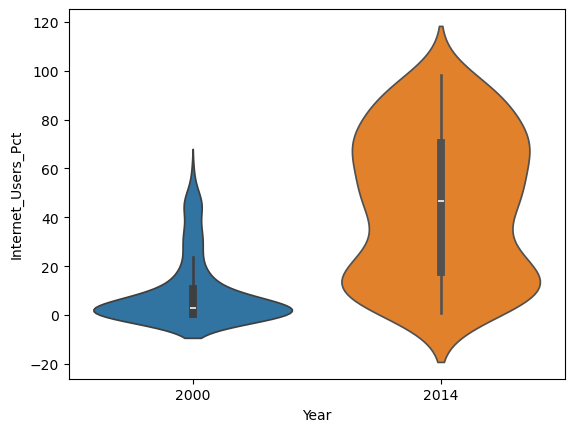

In [53]:
sns.violinplot(x=dist2000['Year'], y=dist2000['Internet_Users_Pct'])
sns.violinplot(x=dist2014['Year'], y=dist2014['Internet_Users_Pct'])


## 19 For how many countries was internet usage below 5% in 2014
10

In [54]:
dist2014.loc[dist2014.Internet_Users_Pct < 5]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


## 20 Merge the 2 DFs. Keep all rows from each. Call it gdp_and_internet_use. 

In [55]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how= 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891
...,...,...,...,...
9494,Zimbabwe,2019,3294.806084,26.588300
9495,Zimbabwe,2020,2987.269823,29.298600
9496,Zimbabwe,2021,3184.785451,32.461600
9497,Zimbabwe,2022,3323.121932,32.561500


## 21: Find the 3 countries with with highest internet usage in 2014. Use a seaborn FacetGrid to see GDP over time for these three.

In [56]:
gdp_and_internet_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]

In [57]:
gdp_and_internet_2014.nlargest(3, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3944,Iceland,2014,57981.199448,98.158
2867,Falkland (Malvinas) Islands,2014,NaN,97.600
824,Bermuda,2014,92298.387811,96.800


In [58]:
gdp_and_internet_3largest = gdp_and_internet_use.loc[(gdp_and_internet_use.Country == 'Iceland') | (gdp_and_internet_use.Country =='Falkland (Malvinas) Islands') | (gdp_and_internet_use.Country =='Bermuda')]

In [59]:
gdp_and_internet_3largest

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
800,Bermuda,1990,79109.890650,0.0000
801,Bermuda,1991,75754.494259,NaN
802,Bermuda,1992,75160.932166,NaN
803,Bermuda,1993,76883.813796,NaN
804,Bermuda,1994,76850.912239,NaN
...,...,...,...,...
3949,Iceland,2019,65065.905682,99.5049
3950,Iceland,2020,59575.190393,99.5328
3951,Iceland,2021,61685.835611,99.6870
3952,Iceland,2022,65563.920870,99.8565


In [66]:
gdp_and_internet_3largest.loc[gdp_and_internet_3largest.Country == 'Falkland (Malvinas) Islands']

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2847,Falkland (Malvinas) Islands,1990,NaN,0.00000
2848,Falkland (Malvinas) Islands,1993,NaN,0.00000
2849,Falkland (Malvinas) Islands,1994,NaN,0.00000
2850,Falkland (Malvinas) Islands,1995,NaN,0.00000
2851,Falkland (Malvinas) Islands,1997,NaN,3.76081
2852,Falkland (Malvinas) Islands,1999,NaN,56.39760
2853,Falkland (Malvinas) Islands,2000,NaN,58.62070
2854,Falkland (Malvinas) Islands,2001,NaN,64.60390
2855,Falkland (Malvinas) Islands,2002,NaN,64.14580
2856,Falkland (Malvinas) Islands,2003,NaN,64.01620


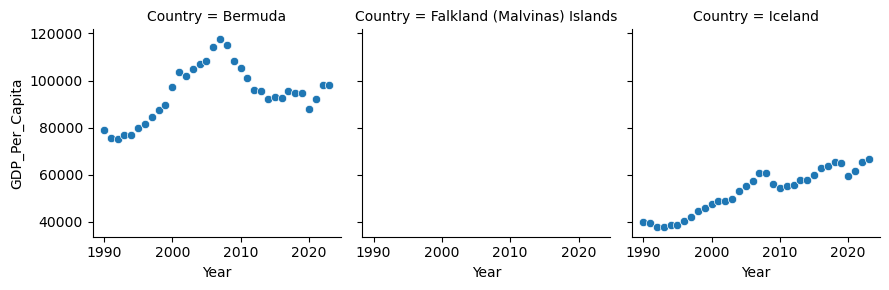

In [64]:
g = sns.FacetGrid(gdp_and_internet_3largest, col = 'Country')
g.map(sns.scatterplot, 'Year',  'GDP_Per_Capita')